In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pgmpy.estimators import PC
from pgmpy.models import BayesianNetwork

In [2]:
covid_policies_df = pd.read_csv(
    "../data/processed/categorical_policies.csv"
)
covid_policies_df.set_index(["country", "date"], inplace=True)
print(covid_policies_df.shape)
covid_policies_df.head()

(23860, 17)


school_closures  workplace_closures  cancel_public_events  \
country date                                                                    
china   2020-05-02                2                   1                     1   
        2020-05-03                2                   1                     1   
        2020-05-04                2                   1                     1   
        2020-05-05                2                   1                     1   
        2020-05-06                2                   1                     1   

                    restrict_public_gathering  closure_public_transport  \
country date                                                              
china   2020-05-02                          3                         0   
        2020-05-03                          3                         0   
        2020-05-04                          3                         0   
        2020-05-05                          3                         0   
        2020-05-06                          3                         0   

                    shn_requirement  restriction_internal_movement  \
country date                                                         
china   2020-05-02                0                              1   
        2020-05-03                0                              1   
        2020-05-04                0                              1   
        2020-05-05                0                              1   
        2020-05-06                0                              1   

                    internation_travel_control  pi_campaign  testing_policy  \
country date                                                                  
china   2020-05-02                         4.0            2             3.0   
        2020-05-03                         4.0            2             3.0   
        2020-05-04                         4.0            2             3.0   
        2020-05-05                         4.0            2             3.0   
        2020-05-06                         4.0            2             3.0   

                    contact_tracing  facial_covering  vaccine_policy  \
country date                                                           
china   2020-05-02              2.0                2               0   
        2020-05-03              2.0                2               0   
        2020-05-04              2.0                2               0   
        2020-05-05              2.0                2               0   
        2020-05-06              2.0                2               0   

                    confirmed_cases  confirmed_deathes  cases_per_mil  \
country date                                                            
china   2020-05-02            991.0                6.0       0.684392   
        2020-05-03            991.0                6.0       0.684392   
        2020-05-04            991.0                6.0       0.684392   
        2020-05-05            991.0                6.0       0.684392   
        2020-05-06            991.0                6.0       0.684392   

                    cases_per_mil_cat  
country date                           
china   2020-05-02                  0  
        2020-05-03                  0  
        2020-05-04                  0  
        2020-05-05                  0  
        2020-05-06                  0

In [3]:
sg_filtered = covid_policies_df.loc[
    "singapore",
    [
        "school_closures",
        "workplace_closures",
        #         "cancel_public_events",
        #         "restrict_public_gathering",
        #         "closure_public_transport",
        "cases_per_mil",
        "cases_per_mil_cat",
        "confirmed_cases",
    ],
]
sg_filtered.head()

,school_closures,workplace_closures,cases_per_mil,cases_per_mil_cat,confirmed_cases
date,,,,,
2020-05-02,3,3,3219.816514,0,17548.0
2020-05-03,3,3,3340.366972,0,18205.0
2020-05-04,3,3,3445.504587,0,18778.0
2020-05-05,3,3,3561.467890,0,19410.0
2020-05-06,3,3,3706.055046,0,20198.0


In [4]:
ml_filtered = covid_policies_df.loc[
    "malaysia",
    [
        "school_closures",
        "workplace_closures",
        #         "cancel_public_events",
        #         "restrict_public_gathering",
        #         "closure_public_transport",
        "cases_per_mil",
        "cases_per_mil_cat",
        "confirmed_cases",
    ],
]

ml_filtered.head()

,school_closures,workplace_closures,cases_per_mil,cases_per_mil_cat,confirmed_cases
date,,,,,
2020-05-02,3,3,193.00000,0,6176.0
2020-05-03,3,3,196.81250,0,6298.0
2020-05-04,3,2,198.53125,0,6353.0
2020-05-05,3,2,199.46875,0,6383.0
2020-05-06,3,2,200.87500,0,6428.0


<AxesSubplot:xlabel='cases_per_mil', ylabel='Count'>

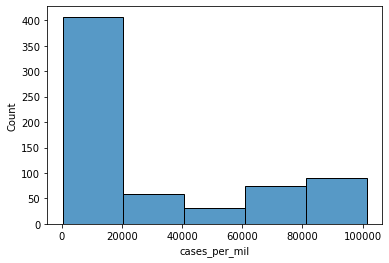

In [5]:
import seaborn as sns

sns.histplot(ml_filtered.cases_per_mil, bins=5)

In [6]:
# from pgmpy.estimators import PC

# est = PC(data=sg_filtered[["school_closures", "workplace_closures", "cases_per_mil_cat"]].iloc[:500], )
# res = est.estimate(max_cond_vars=3)
# import networkx as nx

# nx.draw(res, with_labels=True)

## Contruct MRF with a subset of features

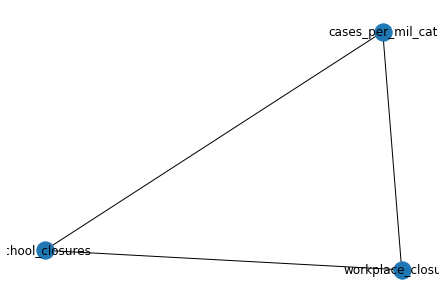

In [7]:
import networkx as nx
from pgmpy.models import MarkovNetwork, BayesianNetwork

# G = MarkovNetwork()
# G.add_nodes_from(["school_closures", "workplace_closures", "cases_per_mil_cat"])
# G.add_edges_from([("school_closures", "workplace_closures"),
#                   ("workplace_closures", "cases_per_mil_cat")
#                  ])
# nx.draw(G, with_labels=True)


sample_model = BayesianNetwork(
    [
        ("school_closures", "cases_per_mil_cat"),
        ("workplace_closures", "cases_per_mil_cat"),
    ]
)
G = sample_model.to_markov_model()
nx.draw(G, with_labels=True)

In [8]:
for column in ["school_closures", "workplace_closures", "cases_per_mil_cat"]:
    print(ml_filtered[column].unique())

[3 2 1 0]
[3 2 1]
[0 1 2 3 4 5]


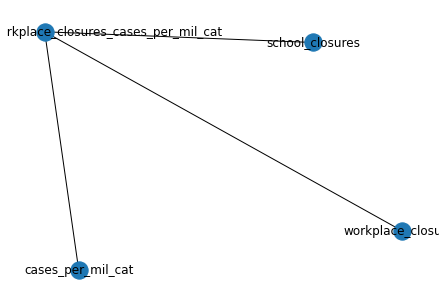

In [9]:
from pgmpy.factors.discrete import DiscreteFactor
phi = DiscreteFactor(["school_closures", "workplace_closures", "cases_per_mil_cat"], [4, 3, 6], np.ones(72))
G.add_factors(phi)
nx.draw(G.to_factor_graph(), with_labels=True)

In [ ]:
from pgmpy.inference import BeliefPropagation
bp = BeliefPropagation(G)
bp.map_query(["cases_per_mil_cat"], evidence={"school_closures": 2, "workplace_closures": 1})

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    ml_filtered[["school_closures", "workplace_closures"]],
    ml_filtered[["cases_per_mil_cat"]],
)
x_train.shape, x_test.shape

In [ ]:
y_train.cases_per_mil_cat.value_counts()

In [ ]:
y_test.cases_per_mil_cat.value_counts()

In [ ]:
from pgmpy.estimators import MaximumLikelihoodEstimator

G.fit(pd.concat([x_train, y_train], axis=1), MaximumLikelihoodEstimator)

In [ ]:
for cpd in sample_model.get_cpds():
    print(cpd)

In [ ]:
from pgmpy.inference import VariableElimination

ve = VariableElimination(sample_model)

print(
    ve.query(
        ["cases_per_mil_cat"], evidence={"school_closures": 2, "workplace_closures": 1}
    )
)